In [1]:
# Program to Dollar Cost Average Investment.
# The Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Read the dat
asset = pd.read_csv('/content/spy.csv')
asset = asset.set_index(pd.DatetimeIndex(asset['Date'].values))
asset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1993-01-29,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.968958,1003200
1993-02-01,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.153660,480500
1993-02-02,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.209057,201300
1993-02-03,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.486113,529400
1993-02-04,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.596937,531500


Text(0, 0.5, 'Adj Close Price (USD)')

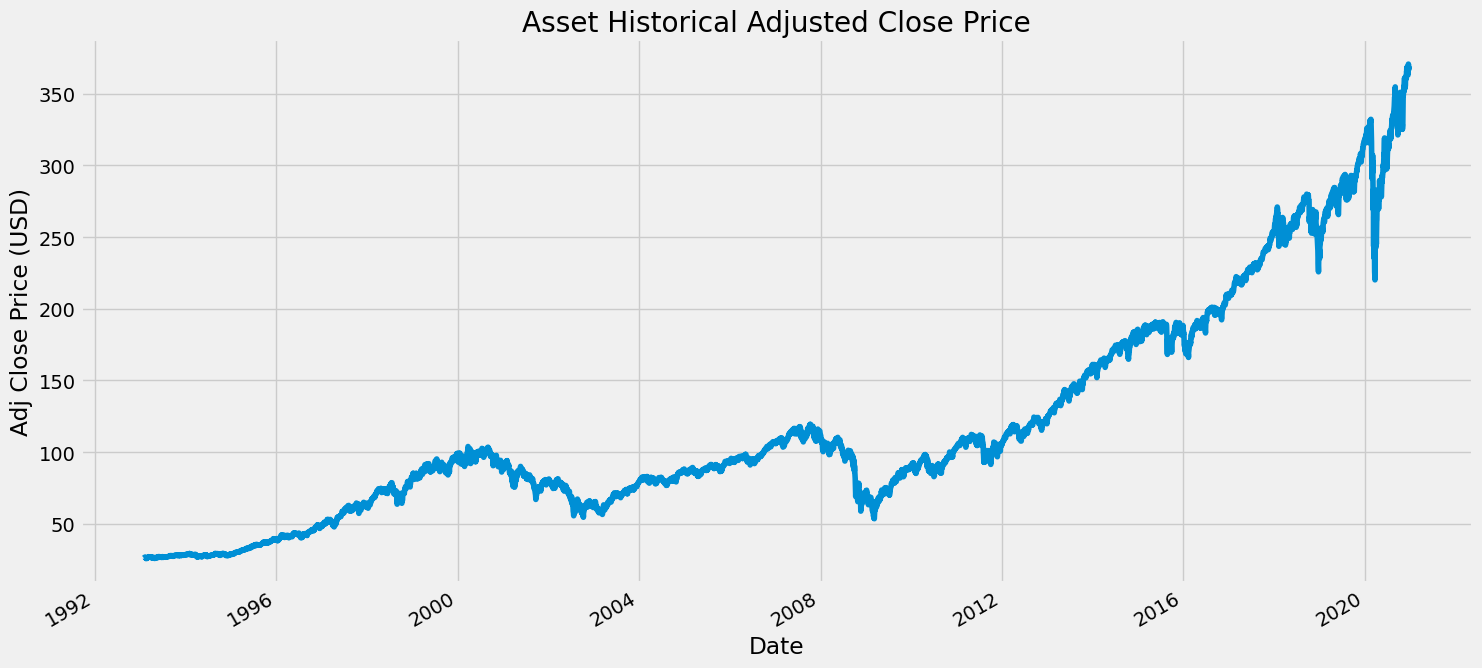

In [3]:
# Visual data of adj close price
asset['Adj Close'].plot(figsize = (16,8))
plt.title('Asset Historical Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price (USD)')

In [4]:
# Showing the lum sum investment strategy
adj_close_prices = asset['Adj Close']
# Initial investment and the last price of the stock
initial_investment = 5000
last_stock_value = adj_close_prices[-1]
# Number of Shares bought on each date
num_shares_bought = initial_investment / adj_close_prices
# How much money you would have
lump_sum = last_stock_value * num_shares_bought
# Show the data
lump_sum

1993-01-29    71046.362624
1993-02-01    70544.620243
1993-02-02    70395.512905
1993-02-03    69659.146597
1993-02-04    69368.889641
                  ...     
2020-12-18     4997.562264
2020-12-21     5015.495225
2020-12-22     5023.962665
2020-12-23     5019.451977
2020-12-24     5000.000000
Name: Adj Close, Length: 7029, dtype: float64

In [5]:
# Compute and show the best and worst day for a lum sum investment
print('Lum Sum Investments:')
print('The best day to invest a $ ' + str(initial_investment)+' lump sum was on  '+lump_sum.idxmax().strftime('%b %d %Y')+' would be worth $'+str(round(lump_sum.max(), 2))+' on '+lump_sum.last_valid_index().strftime('%b %d %Y'))
print('The worst day to invest a $ ' + str(initial_investment)+' lump sum was on  '+lump_sum.idxmin().strftime('%b %d %Y')+' would be worth $'+str(round(lump_sum.min(), 2))+' on '+lump_sum.last_valid_index().strftime('%b %d %Y'))

Lum Sum Investments:
The best day to invest a $ 5000 lump sum was on  Feb 18 1993 would be worth $71915.92 on Dec 24 2020
The worst day to invest a $ 5000 lump sum was on  Dec 17 2020 would be worth $4977.61 on Dec 24 2020


Text(0, 0.5, 'Investment value (USD)')

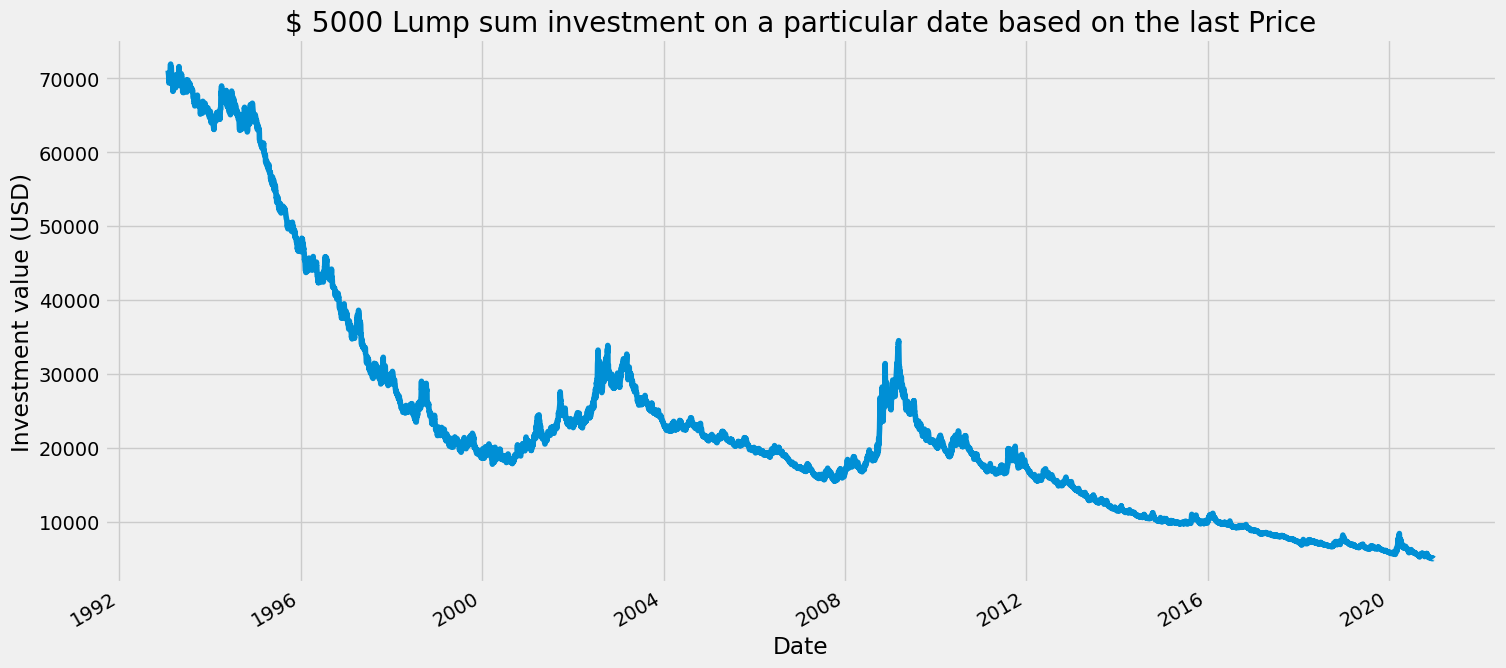

In [6]:
# Plot the lump sum data
lump_sum.plot(figsize = (16,8))
plt.title('$ '+str(initial_investment)+' Lump sum investment on a particular date based on the last Price')
plt.xlabel('Date')
plt.ylabel('Investment value (USD)')

In [7]:
# Creating a function to calculate the dollar cost average strategy
def DCA(start_date, initial_investment):
  # The investment periods which is 12
  investment_date_periods = 12.0
  # Calculate the portion or amount that we plan to invest for each investment period
  investment_portion = initial_investment / investment_date_periods

  # Get the dates of investment periods
  all_investment_dates = pd.date_range(start_date, periods = investment_date_periods, freq = '30D')

  # Get the dates upto the last dates in our dataset
  investment_dates = all_investment_dates[all_investment_dates < asset.index[-1]]

  # Get the indices within the dataset that are close to the investment date
  closest_investment_dates = asset.index.searchsorted(investment_dates)

  # Get a list of stock prices at the closest investment date
  stock_prices = asset['Adj Close'][closest_investment_dates]

  # Get the total number shares that we invested by summing all the purchased shares
  total_shares_invested = sum(investment_portion / stock_prices)

  # Get the cash that was not invested from the initial ivestment amount
  uninvested_cash = investment_portion * sum(all_investment_dates >= asset.index[-1])

  # Calculate the total
  total = uninvested_cash + asset['Adj Close'][-1] * total_shares_invested
  return total



In [8]:
# Execute the DCA function
DCA_List = []
for date in asset.index:
  DCA_List.append( DCA(date, initial_investment))

In [9]:
# Convert the list to a series, create a new dataframe
dca = pd.DataFrame()
dca['DCA'] = DCA_List
# Set the date as index
dca = dca.set_index(pd.DatetimeIndex(asset.index))
# Convert the dataframe to a series
dca = dca.squeeze()
dca

1993-01-29    67961.897400
1993-02-01    67913.174670
1993-02-02    67932.773898
1993-02-03    67946.518709
1993-02-04    67827.447937
                  ...     
2020-12-18     4999.796855
2020-12-21     5001.291269
2020-12-22     5001.996889
2020-12-23     5001.620998
2020-12-24     5000.000000
Name: DCA, Length: 7029, dtype: float64

In [10]:
# Compute and show the best and worst day for a DCA investment
print('DCA Investments:')
print('The best day to start DCA investing of a $ ' + str(initial_investment)+' investment was on  '+dca.idxmax().strftime('%b %d %Y')+' would be worth $'+str(round(dca.max(), 2))+' on '+dca.last_valid_index().strftime('%b %d %Y'))
print('The worst day to start DCA investing of a $ ' + str(initial_investment)+' investment was on  '+dca.idxmin().strftime('%b %d %Y')+' would be worth $'+str(round(dca.min(), 2))+' on '+dca.last_valid_index().strftime('%b %d %Y'))

DCA Investments:
The best day to start DCA investing of a $ 5000 investment was on  Feb 23 1993 would be worth $68079.68 on Dec 24 2020
The worst day to start DCA investing of a $ 5000 investment was on  Dec 17 2020 would be worth $4998.13 on Dec 24 2020


Text(0, 0.5, 'Investment value (USD)')

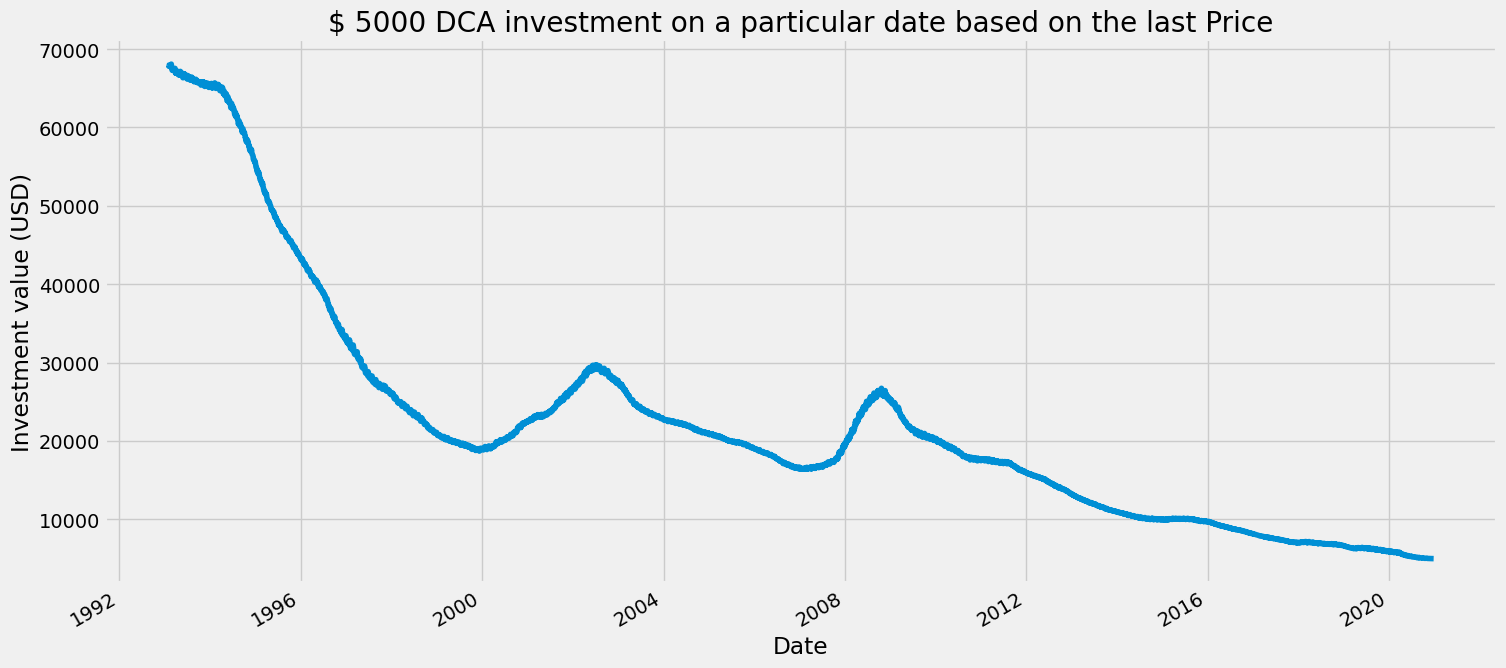

In [11]:
# Plot the DCA
dca.plot(figsize = (16,8))
plt.title('$ '+str(initial_investment)+' DCA investment on a particular date based on the last Price')
plt.xlabel('Date')
plt.ylabel('Investment value (USD)')

In [12]:
# Get the Volatility
lump_sum_vol = lump_sum.pct_change().std()
dca_vol = dca.pct_change().std()

print('Lump Sum Volatility:', lump_sum_vol)
print('DCA Volatility:', dca_vol)

Lump Sum Volatility: 0.011936524399530819
DCA Volatility: 0.0037152646571321107


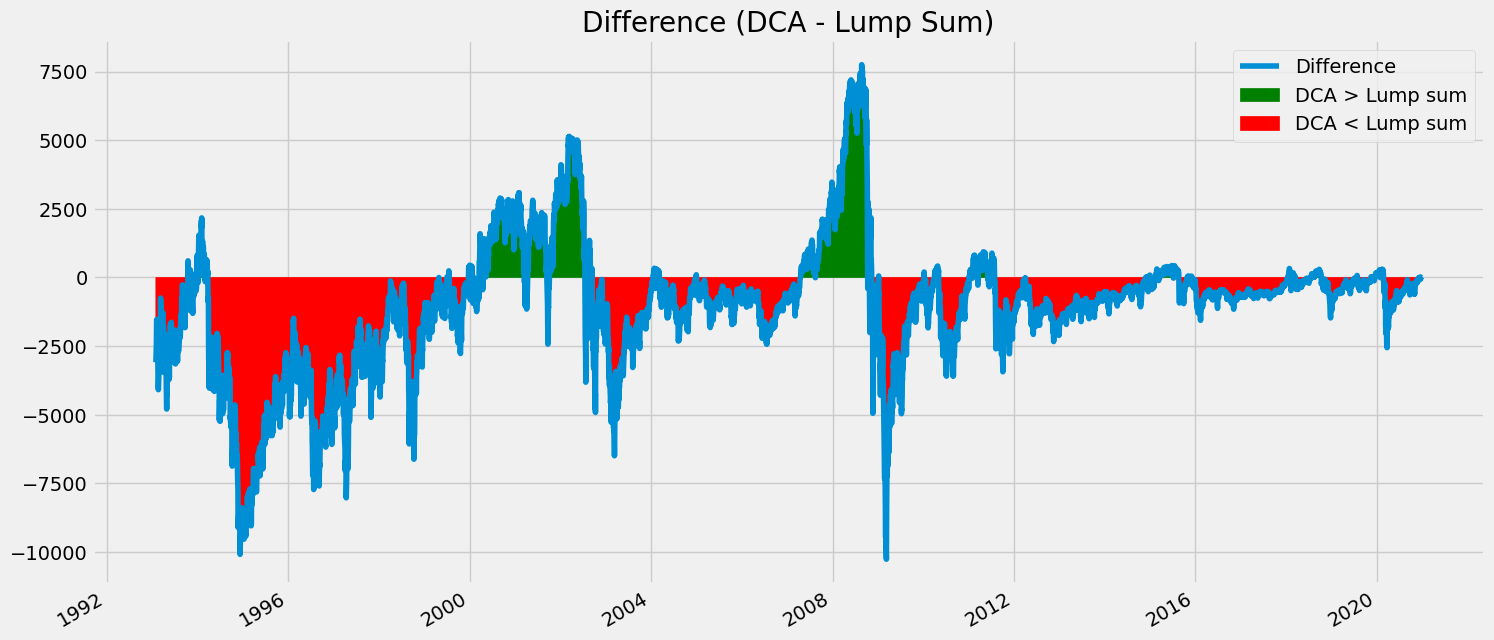

In [13]:
# Get the Difference
difference = dca- lump_sum
# Plot the difference
difference.plot(figsize = (16,8), label = 'Difference')
plt.fill_between(difference.index, y1 = difference, y2 = 0, color = 'green', where = difference>0, label = 'DCA > Lump sum')
plt.fill_between(difference.index, y1 = difference, y2 = 0, color = 'red', where = difference<0, label = 'DCA < Lump sum')
plt.title('Difference (DCA - Lump Sum)')
plt.legend()

In [14]:
# Calculate the winning percentage
lump_sum_win_percentage = round( sum(difference<0) / len(difference) * 100, 1)
dca_win_percentage = round( sum(difference>0) / len(difference) * 100, 1)

print('Lump Sum Investment Strategy returned more than dca: '+str(lump_sum_win_percentage)+ '% of the time.')
print('Dollar Cost Average Returned more than Lump Sum: '+str(dca_win_percentage)+ '% of the time.')

Lump Sum Investment Strategy returned more than dca: 78.4% of the time.
Dollar Cost Average Returned more than Lump Sum: 21.6% of the time.
